In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from keras.activations import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,LSTM,GRU,Bidirectional
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score ,confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
x_train = pd.read_csv(r"/kaggle/input/hijja-dataset/train_X.csv",header=None)
y_train = pd.read_csv(r"/kaggle/input/hijja-dataset/train_Y.csv",header=None)

x_test = pd.read_csv(r"/kaggle/input/hijja-dataset/test_X.csv",header=None)
y_test = pd.read_csv(r"/kaggle/input/hijja-dataset/test_Y.csv",header=None)

print("x_train.shape =", x_train.shape, "\ny_train.shape =", 
      y_train.shape, "\nx_test.shape =", x_test.shape, "\ny_test.shape =", y_test.shape)

x_train.shape = (37933, 1024) 
y_train.shape = (37933, 1) 
x_test.shape = (9501, 1024) 
y_test.shape = (9501, 1)


In [3]:
x_train = x_train.iloc[:,:].values
x_test = x_test.iloc[:,:].values
y_train = y_train.iloc[:,:].values
y_test = y_test.iloc[:,:].values
print("x_train.shape =", x_train.shape, "\ny_train.shape =", 
      y_train.shape, "\nx_test.shape =", x_test.shape, "\ny_test.shape =", y_test.shape)

x_train.shape = (37933, 1024) 
y_train.shape = (37933, 1) 
x_test.shape = (9501, 1024) 
y_test.shape = (9501, 1)


In [4]:
x_train = x_train.reshape(-1,32,32,1)
x_test = x_test.reshape(-1,32,32,1)

x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape, x_test.shape)

(37933, 32, 32, 1) (9501, 32, 32, 1)


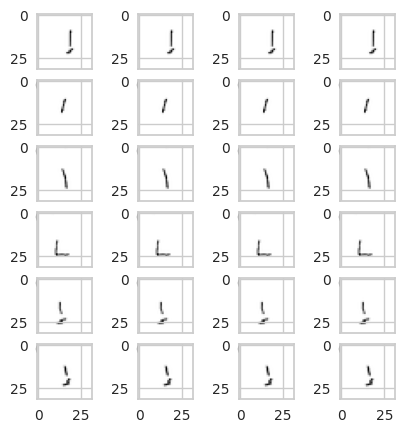

In [5]:
fig, ax = plt.subplots(6,4,figsize=(5,5))

for i in range(6):
    for j in range(4):
        ax[i,j].imshow(x_train[i+2])

In [6]:
total_classes = len(np.unique(y_train))+1
y_train = to_categorical(y_train,total_classes)
y_test = to_categorical(y_test, total_classes)

print(y_train.shape)
print(y_test.shape)

(37933, 30)
(9501, 30)


In [7]:
model = Sequential([
    
    
    Bidirectional(LSTM(256, return_sequences=True, dropout=0.25), input_shape=(32,32)),
    Dense(256, activation='relu'),
    
    Bidirectional(LSTM(128, return_sequences=True, dropout=0.5)),
    Dense(128, activation='relu'),
    
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.5)),
    Dense(64, activation='relu'),
    
    Bidirectional(LSTM(32, return_sequences=True, dropout=0.5)),
    Dense(32, activation='relu'),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(total_classes, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 32, 512)          591872    
 l)                                                              
                                                                 
 dense (Dense)               (None, 32, 256)           131328    
                                                                 
 bidirectional_1 (Bidirectio  (None, 32, 256)          394240    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 32, 128)           32896     
                                                                 
 bidirectional_2 (Bidirectio  (None, 32, 128)          98816     
 nal)                                                            
                                                        

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [9]:
history = model.fit(x_train,y_train,
                    #steps_per_epoch=len(x_train)//128,
                    batch_size=128,
                    epochs=150,
                    validation_data=(x_test, y_test),
                   # validation_steps=50
                   )

Epoch 1/150
297/297 [==============================] - 31s 43ms/step - loss: 2.8307 - accuracy: 0.1628 - val_loss: 2.4218 - val_accuracy: 0.2554
Epoch 2/150
297/297 [==============================] - 10s 32ms/step - loss: 2.1792 - accuracy: 0.3174 - val_loss: 1.8632 - val_accuracy: 0.4052
Epoch 3/150
297/297 [==============================] - 10s 33ms/step - loss: 1.8321 - accuracy: 0.4174 - val_loss: 1.4684 - val_accuracy: 0.5243
Epoch 4/150
297/297 [==============================] - 10s 32ms/step - loss: 1.5809 - accuracy: 0.4984 - val_loss: 1.3093 - val_accuracy: 0.5747
Epoch 5/150
297/297 [==============================] - 10s 33ms/step - loss: 1.3620 - accuracy: 0.5652 - val_loss: 1.1062 - val_accuracy: 0.6440
Epoch 6/150
297/297 [==============================] - 10s 32ms/step - loss: 1.2072 - accuracy: 0.6136 - val_loss: 0.9952 - val_accuracy: 0.6815
Epoch 7/150
297/297 [==============================] - 10s 33ms/step - loss: 1.1224 - accuracy: 0.6418 - val_loss: 0.9342 - val_ac

In [10]:
y_held_pred=model.predict(x_test)

297/297 [==============================] - 6s 10ms/step


In [11]:
y_pred=np.argmax(y_held_pred, axis=1)
y_test_1=np.argmax(y_test, axis=1)

print(y_test_1.shape)
print(y_pred.shape)

(9501,)
(9501,)


In [12]:
model.evaluate(x_test,y_test)

297/297 [==============================] - 3s 11ms/step - loss: 0.6888 - accuracy: 0.8497


[0.6888142228126526, 0.8497000336647034]

In [13]:
his=model.evaluate(x_test, y_test, verbose=2);
print(his)

297/297 - 3s - loss: 0.6888 - accuracy: 0.8497 - 3s/epoch - 10ms/step
[0.6888142228126526, 0.8497000336647034]


In [14]:
y_held_pred_train=model.predict(x_train)

1186/1186 [==============================] - 12s 10ms/step


In [15]:
y_pred_train=np.argmax(y_held_pred_train, axis=1)
y_train_1=np.argmax(y_train, axis=1)

print(y_train_1.shape)
print(y_pred_train.shape)
model.evaluate(x_train, y_train, verbose=2);

(37933,)
(37933,)
1186/1186 - 12s - loss: 0.0521 - accuracy: 0.9829 - 12s/epoch - 10ms/step


<Axes: title={'center': 'Actual vs. Predicted'}, xlabel='Actual G*', ylabel='Predicted G*'>

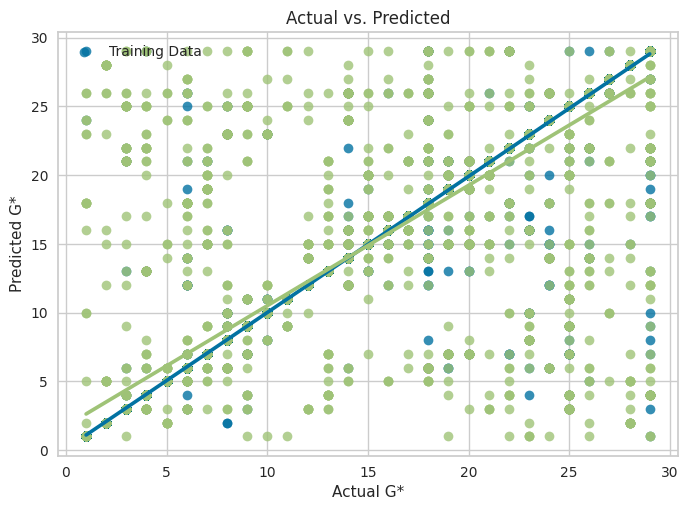

In [16]:
import seaborn as sns

sns.regplot(x=y_train_1,y=y_pred_train, label="Training Data")

plt.xlabel('Actual G*')
plt.ylabel('Predicted G*')
plt.title('Actual vs. Predicted')
plt.legend(loc="upper left")

sns.regplot(x=y_test_1,y=y_pred, label="Testing Data")

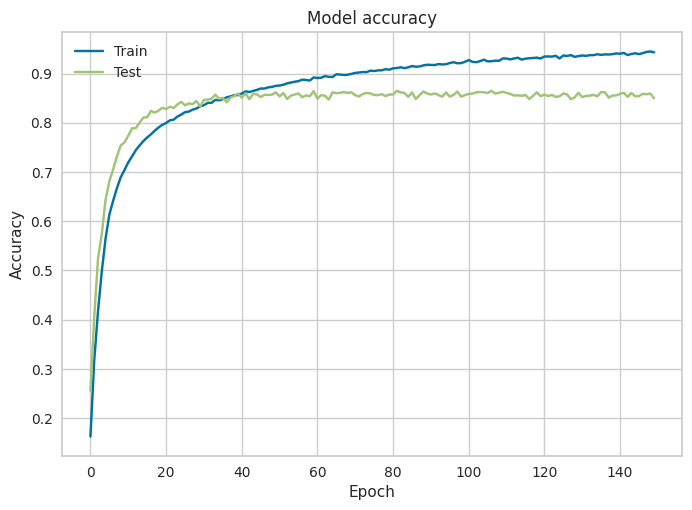

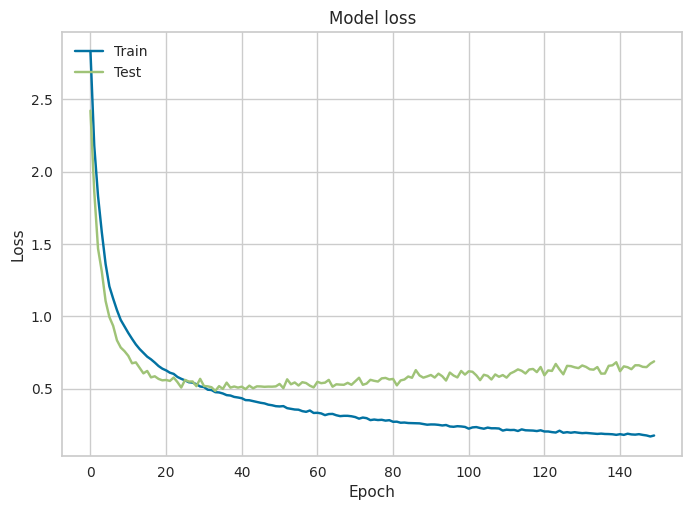

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
y_predicted = model.predict(x_test)
y_grand_truth = y_test
y_predicted = np.argmax(y_predicted,axis=1)
y_grand_truth = np.argmax(y_grand_truth,axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_grand_truth, y_predicted)

297/297 [==============================] - 3s 10ms/step


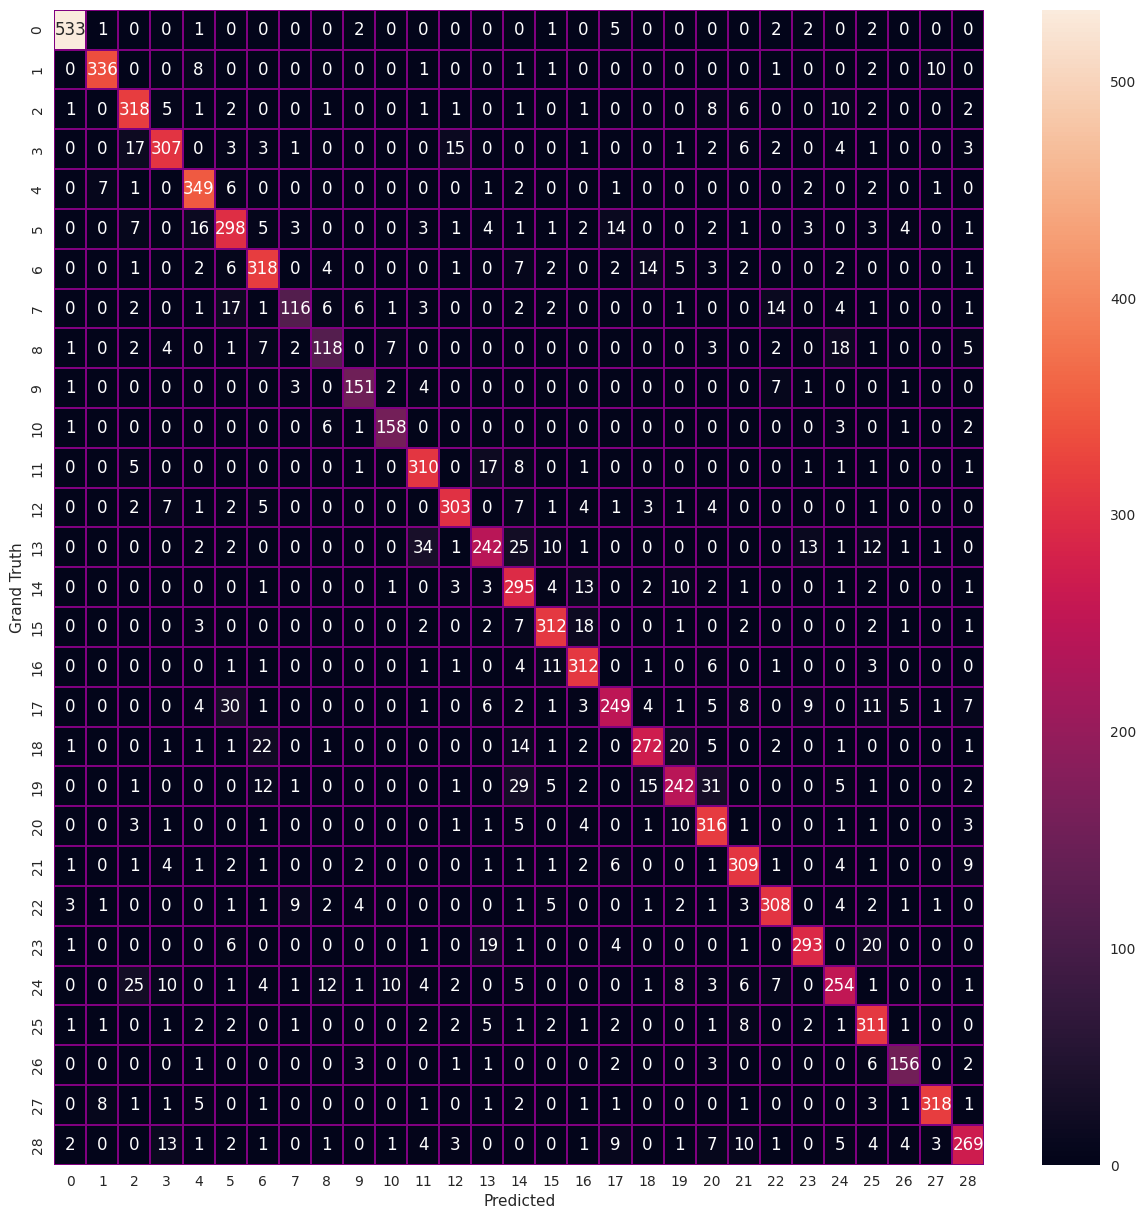

In [19]:
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.1, linecolor="purple", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Grand Truth")
plt.show()

In [20]:
scores = np.zeros((28,3))
def calc_F1(num):
  TP = cm[num,num]
  FN = np.sum(cm[num,:])-cm[num,num]
  FP = np.sum(cm[:,num])-cm[num,num]
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  F1_score = 2*(recall * precision) / (recall + precision)
  return precision, recall, F1_score
for i in range(28):
   precision, recall, F1_score = calc_F1(i)
   scores[i,:] = precision, recall, F1_score
scores_frame = pd.DataFrame(scores,columns=["Precision", "Recall", "F1 Score"], index=[list(range(0, 28))])

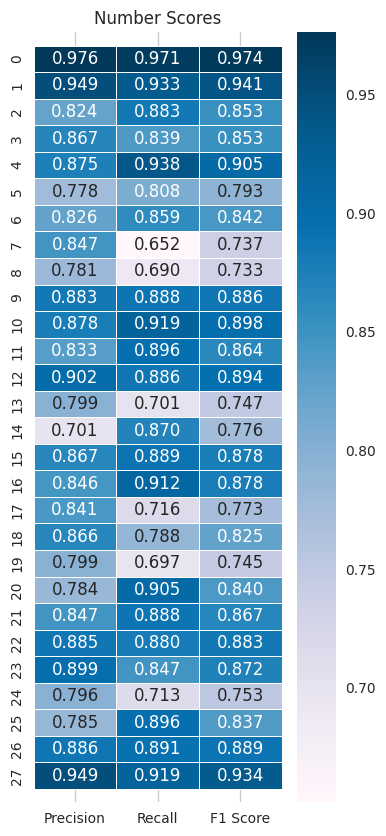

In [21]:
f, ax = plt.subplots(figsize = (4,10))
ax.set_title('Number Scores')
sns.heatmap(scores_frame, annot=True, fmt=".3f", linewidths=0.5, cmap="PuBu", cbar=True, ax=ax)
bottom, top = ax.get_ylim()
plt.ylabel("")
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [22]:
# Functions: Performance Evaluation 

def Performance(Model , y_predd): 
    
    # model accuracy
    accuracy = accuracy_score(y_test_1, y_predd)
    print( Model +' Accuracy:'+'\033[1m {:.2f}%'.format(accuracy*100))
    
    # model Classification Report
    print('\nClassification Report: '+'\033[0m')
    print('*' * 22)
    print(classification_report(y_test_1, y_predd))

In [23]:
Performance('Bi-LSTM' , y_pred)

Bi-LSTM Accuracy: 84.97%

Classification Report: 
**********************
              precision    recall  f1-score   support

           1       0.98      0.97      0.97       549
           2       0.95      0.93      0.94       360
           3       0.82      0.88      0.85       360
           4       0.87      0.84      0.85       366
           5       0.87      0.94      0.91       372
           6       0.78      0.81      0.79       369
           7       0.83      0.86      0.84       370
           8       0.85      0.65      0.74       178
           9       0.78      0.69      0.73       171
          10       0.88      0.89      0.89       170
          11       0.88      0.92      0.90       172
          12       0.83      0.90      0.86       346
          13       0.90      0.89      0.89       342
          14       0.80      0.70      0.75       345
          15       0.70      0.87      0.78       339
          16       0.87      0.89      0.88       351
        